In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
# Display first few rows of each dataset to understand their structure
print("Customers Dataset:\n", customers.head(), "\n")
print("Products Dataset:\n", products.head(), "\n")
print("Transactions Dataset:\n", transactions.head(), "\n")

# Data overview
print("Customers Info:\n")
print(customers.info())
print("\nProducts Info:\n")
print(products.info())
print("\nTransactions Info:\n")
print(transactions.info())

Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T001

In [4]:
# Check for missing values
def check_missing_values(df, name):
    print(f"\nMissing Values in {name}:\n")
    print(df.isnull().sum())

check_missing_values(customers, "Customers")
check_missing_values(products, "Products")
check_missing_values(transactions, "Transactions")

# Merge datasets for EDA
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
print("\nMerged Data Sample:\n", merged_data.head())


Missing Values in Customers:

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Merged Data Sample:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022


Top 5 Most Purchased Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


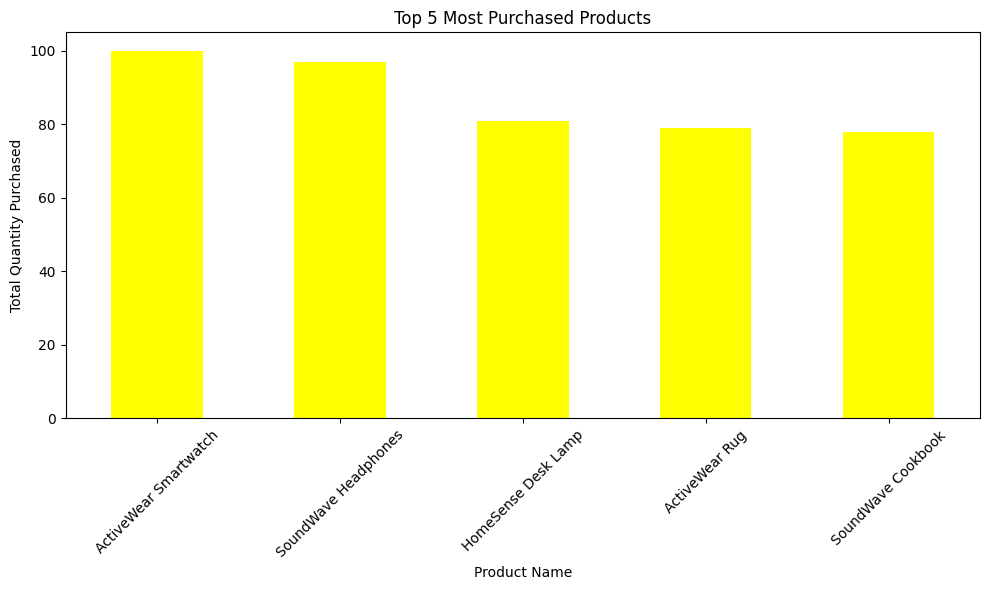

In [5]:
# 1. Top 5 most purchased products
most_purchased = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Most Purchased Products:\n", most_purchased)

# Visualization
plt.figure(figsize=(10, 6))
most_purchased.plot(kind="bar", color="yellow")
plt.title("Top 5 Most Purchased Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Purchased")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Revenue by Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


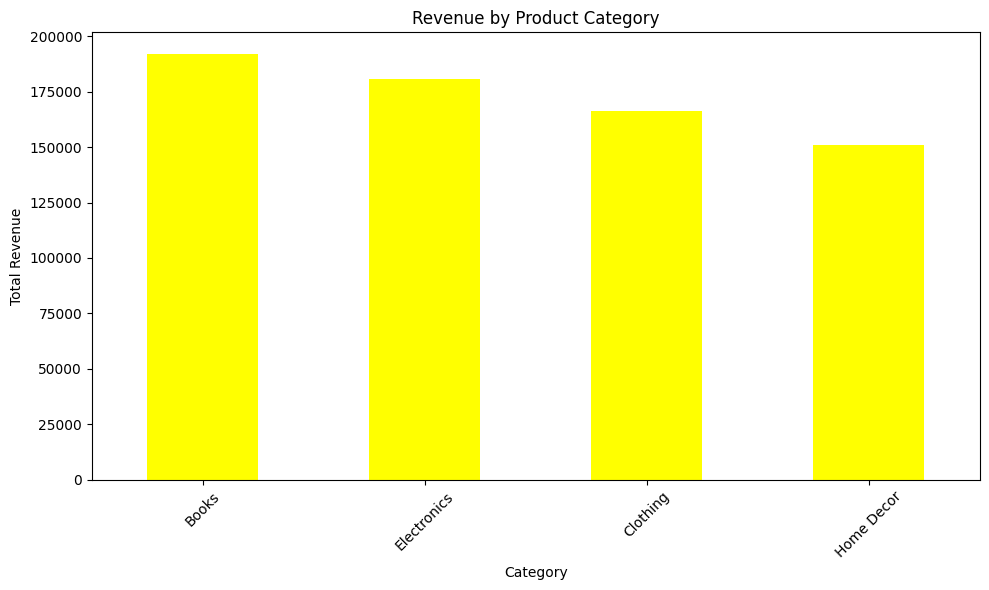

In [6]:
# 2. Revenue contribution by product category
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("\nRevenue by Category:\n", category_revenue)

# Visualization
plt.figure(figsize=(10, 6))
category_revenue.plot(kind="bar", color="yellow")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


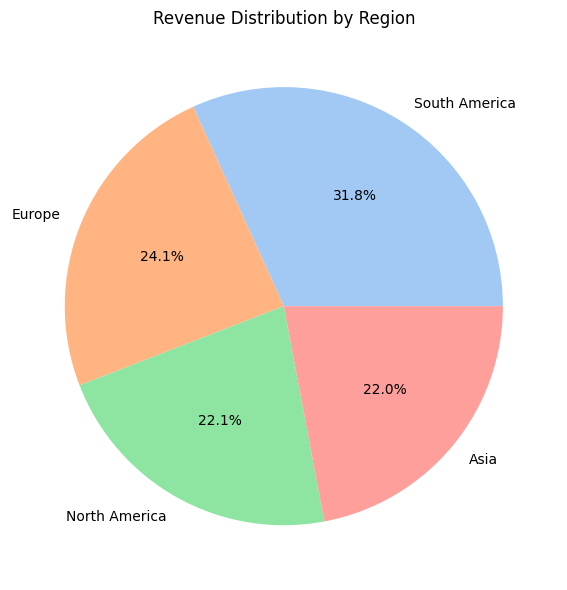

In [7]:
# 3. Regional revenue distribution
region_revenue = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("\nRevenue by Region:\n", region_revenue)

# Visualization
plt.figure(figsize=(8, 6))
region_revenue.plot(kind="pie", autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Revenue Distribution by Region")
plt.ylabel("")
plt.tight_layout()
plt.show()






Monthly Transaction Trends:
 Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


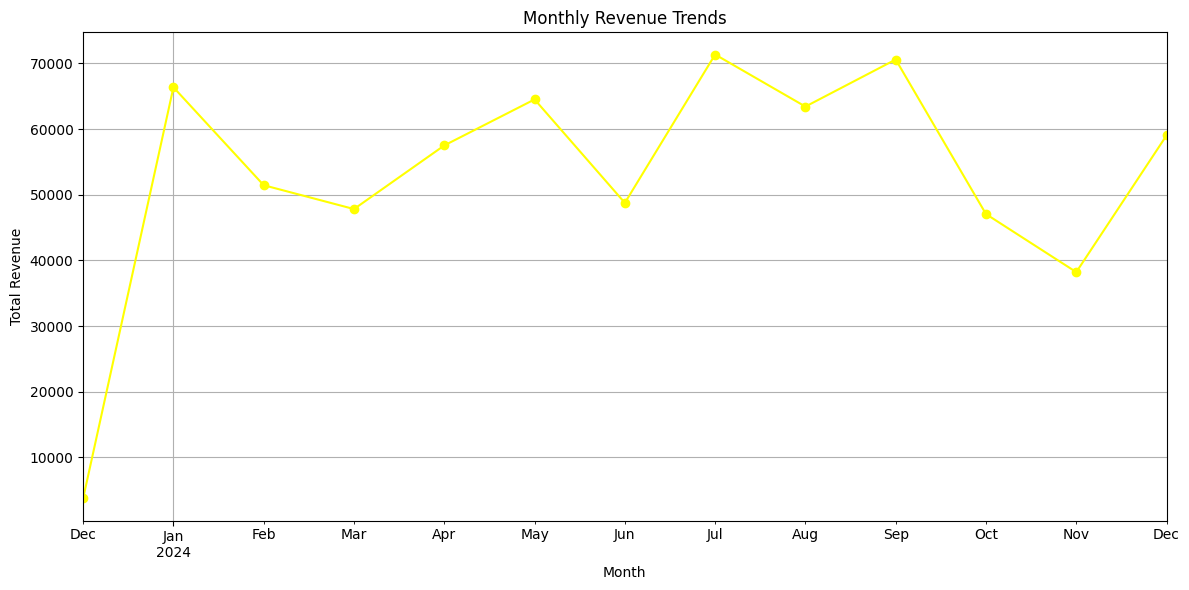

In [8]:
# 4. Monthly transaction trends
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
merged_data["Month"] = merged_data["TransactionDate"].dt.to_period("M")
monthly_trends = merged_data.groupby("Month")["TotalValue"].sum()
print("\nMonthly Transaction Trends:\n", monthly_trends)

# Visualization
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind="line", marker="o", color="yellow")
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()




Signup Trends by Region:
 Region     Asia  Europe  North America  South America
YearMonth                                            
2024-08     NaN     1.0            1.0            2.0
2024-09     4.0     1.0            4.0            2.0
2024-10     NaN     NaN            4.0            1.0
2024-11     3.0     4.0            2.0            2.0
2024-12     NaN     1.0            NaN            NaN


<Figure size 1200x600 with 0 Axes>

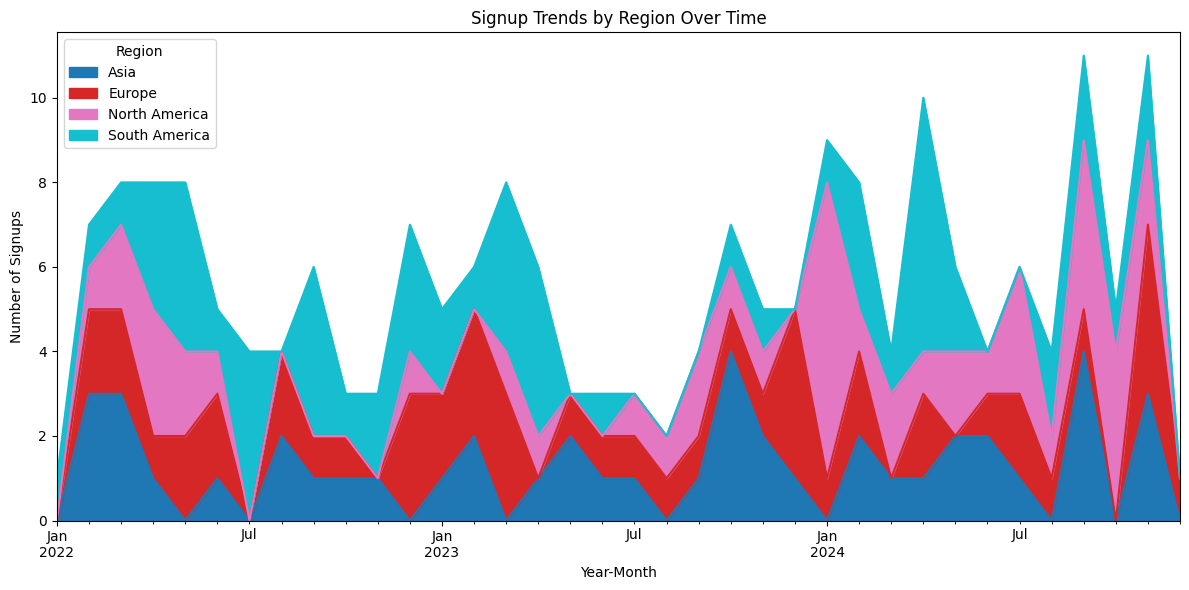

In [9]:
# 5. Signup trends by region
signup_trends = customers.copy()
signup_trends["SignupDate"] = pd.to_datetime(signup_trends["SignupDate"])
signup_trends["YearMonth"] = signup_trends["SignupDate"].dt.to_period("M")
regional_signup = signup_trends.groupby(["YearMonth", "Region"]).size().unstack()
print("\nSignup Trends by Region:\n", regional_signup.tail())

# Visualization
plt.figure(figsize=(12, 6))
regional_signup.plot(kind="area", stacked=True, colormap="tab10", figsize=(12, 6))
plt.title("Signup Trends by Region Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Signups")
plt.tight_layout()
plt.show()